## **Libraries**

In [24]:
# Librerias fundamentales
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Librerias de pytorch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch import optim
import torch

# Librerias auxiliares de sklearn
    # Divide el conjunto de datos en subconjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

    # Muestra la matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay

# Clases y funciones propias
    # Convierte el conjunto de datos en tensores
from dataset_trch import augmentation, images_ds, show_image

    # Crea el modelo
from model_trch import model_highlight

    # Entrena el modelo
from train_trch import model_train

    # Metricas para medir accuracy y matriz de confusión
from metrics_custom import accuracy_trch, confusion_trch
from sklearn.metrics import roc_curve, auc

## **Dataset**

In [25]:
# Lee el excel de datos

# Divide los datos en clases para balancearlas
df_soft = pd.read_excel("images_data.xlsx", sheet_name = "soft")
df_nonsoft = pd.read_excel("images_data.xlsx", sheet_name = "non_soft")

# Balancea las clases
df_soft = df_soft.sample(n = 250)
df_nonsoft = df_nonsoft.sample(n = 250)

# Divide los datos en subconjuntos de entrenamiento y prueba
df_soft_train, df_soft_temp, df_nonsoft_train, df_nonsoft_temp = train_test_split(
    df_soft,
    df_nonsoft,
    test_size = 0.3
)

df_soft_val, df_soft_test, df_nonsoft_val, df_nonsoft_test = train_test_split(
    df_soft_temp,
    df_nonsoft_temp,
    test_size = 0.5
)

# Junta nuevamente las clases en subconjuntos de entrenamiento, validacion y prueba
df_train = pd.concat([df_soft_train, df_nonsoft_train]).sample(frac = 1).reset_index(drop=True)
df_val = pd.concat([df_soft_val, df_nonsoft_val]).reset_index(drop=True)
df_test = pd.concat([df_soft_test, df_nonsoft_test]).reset_index(drop=True)


# Lee las imagenes y crea un objeto que obtiene todos los conjuntos de datos de entrenamiento (tiene aumento de datos)
dataset_train = images_ds(dataset = df_train,
                    file_path_col = "file_path",
                    highlight_col = "highlight_path", 
                    labels_col="soft_story", 
                    data_transform = augmentation,
                    data_augmentation = True,
                    mean_img = [0.5, 0.5, 0.5],
                    std_img = [0.5, 0.5, 0.5],
                    mean_high = [0.5, 0.5, 0],
                    std_high = [0.5, 0.5, 1.]
                    )

# Lee las imagenes y crea un objeto que obtiene todos los conjuntos de datos de prueba (no tiene aumento de datos)
dataset_val = images_ds(dataset = df_val,
                    file_path_col = "file_path",
                    highlight_col = "highlight_path", 
                    labels_col="soft_story", 
                    data_transform = augmentation,
                    data_augmentation = False,
                    mean_img = [0.5, 0.5, 0.5],
                    std_img = [0.5, 0.5, 0.5],
                    mean_high = [0.5, 0.5, 0],
                    std_high = [0.5, 0.5, 1.]
                    )

dataset_test = images_ds(dataset = df_test,
                    file_path_col = "file_path",
                    highlight_col = "highlight_path", 
                    labels_col="soft_story", 
                    data_transform = augmentation,
                    data_augmentation = False,
                    mean_img = [0.5, 0.5, 0.5],
                    std_img = [0.5, 0.5, 0.5],
                    mean_high = [0.5, 0.5, 0],
                    std_high = [0.5, 0.5, 1.]
                    )

# Carga las imagenes para ser utilizadas para entrenamiento por batches
train_loader = DataLoader(dataset = dataset_train, batch_size = 16, shuffle = True)
val_loader = DataLoader(dataset = dataset_val, batch_size = dataset_val.len, shuffle = True)
test_loader = DataLoader(dataset = dataset_test, batch_size = dataset_test.len, shuffle = True)

<PIL.Image.Image image mode=RGB size=256x256 at 0x1FEE230E5D0>


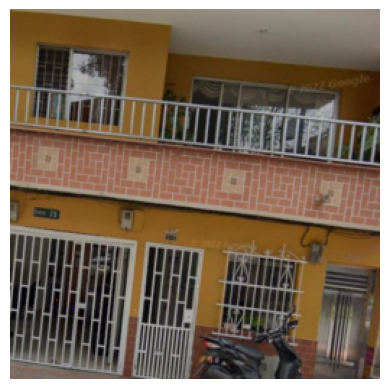

<PIL.Image.Image image mode=RGB size=256x256 at 0x20164177440>


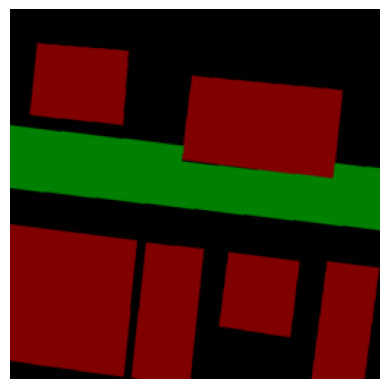

In [26]:
showing = dataset_train[0][0]
show_image(showing, mean = dataset_train.mean_img, std = dataset_train.std_img)
show_image(showing, highlight = True, mean = dataset_train.mean_high, std = dataset_train.std_high)

## **Model Definition**

In [27]:
# se crea el modelo con 2 capa de 128 perceptrones
model = model_highlight(channels_in = 5,
                out_conv = 1024*5*5,
                hidden_layers = [128, 64],
                probability = 0.087849927
                )

# se toma como función de pérdida, la función de entropía cruzada
criterion = nn.BCELoss()

# se utiliza el optimizador Adam evitando entrenar los parámetros del modelo preentrenado
optimizer = optim.Adam(model.parameters(),
                       lr = 0.0000774540218609557,
                       weight_decay = 0.001
                       )

## **Training**

In [28]:
# se definen todas la variables del entrenamiento
metrics = model_train(
    epochs = 30,
    model = model,
    train_loader = train_loader,
    val_loader = val_loader,
    optimizer = optimizer,
    loss_function = criterion,
    metric = accuracy_trch,
    save = True
)

Epoch [1/30] | Train Loss: 0.70 | Train Accuracy: 0.55 | Validation Loss: 0.68 | Validation Accuracy: 0.50
Model saved!
Epoch [2/30] | Train Loss: 0.62 | Train Accuracy: 0.65 | Validation Loss: 0.53 | Validation Accuracy: 0.78
Model saved!
Epoch [3/30] | Train Loss: 0.55 | Train Accuracy: 0.73 | Validation Loss: 0.43 | Validation Accuracy: 0.80
Model saved!
Epoch [4/30] | Train Loss: 0.52 | Train Accuracy: 0.75 | Validation Loss: 0.37 | Validation Accuracy: 0.84
Model saved!
Epoch [5/30] | Train Loss: 0.45 | Train Accuracy: 0.83 | Validation Loss: 0.34 | Validation Accuracy: 0.86
Model saved!
Epoch [6/30] | Train Loss: 0.42 | Train Accuracy: 0.83 | Validation Loss: 0.34 | Validation Accuracy: 0.86
Epoch [7/30] | Train Loss: 0.41 | Train Accuracy: 0.84 | Validation Loss: 0.30 | Validation Accuracy: 0.89
Model saved!
Epoch [8/30] | Train Loss: 0.38 | Train Accuracy: 0.86 | Validation Loss: 0.37 | Validation Accuracy: 0.84
Epoch [9/30] | Train Loss: 0.37 | Train Accuracy: 0.86 | Validatio

## **Metrics**

### *Loss*

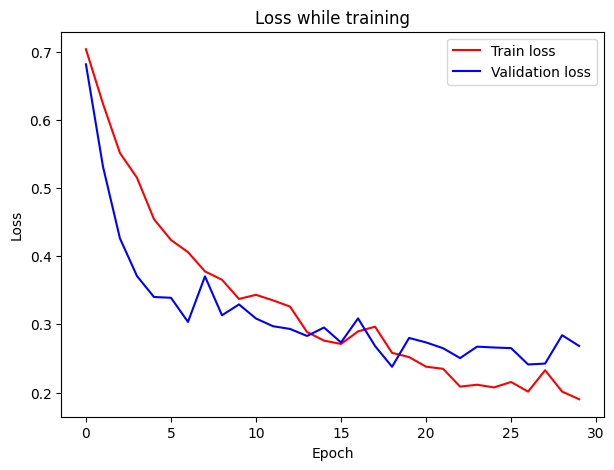

In [29]:
fig, ax = plt.subplots(1,1,figsize = (7,5))
ax.plot(metrics["train_loss"], color = "red", label = "Train loss")
ax.plot(metrics["val_loss"], color = "blue", label = "Validation loss")
ax.set_title("Loss while training")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.legend()
plt.show()

### *Accuracy*

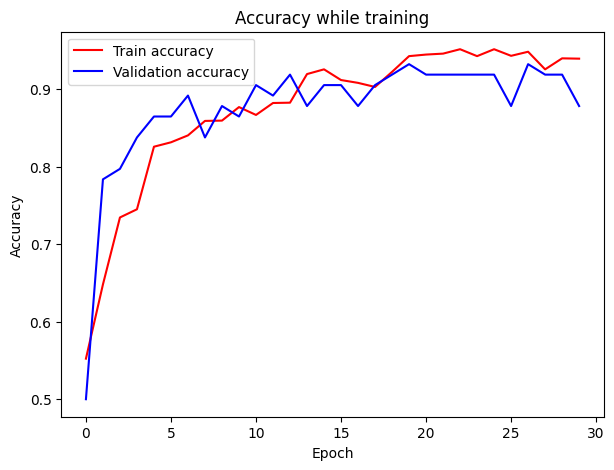

In [30]:
fig, ax = plt.subplots(1,1,figsize = (7,5))
ax.plot(metrics["train_accuracy"], color = "red", label = "Train accuracy")
ax.plot(metrics["val_accuracy"], color = "blue", label = "Validation accuracy")
ax.set_title("Accuracy while training")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.legend()
plt.show()

## **Test**

### *ROC and Confusion matrix*

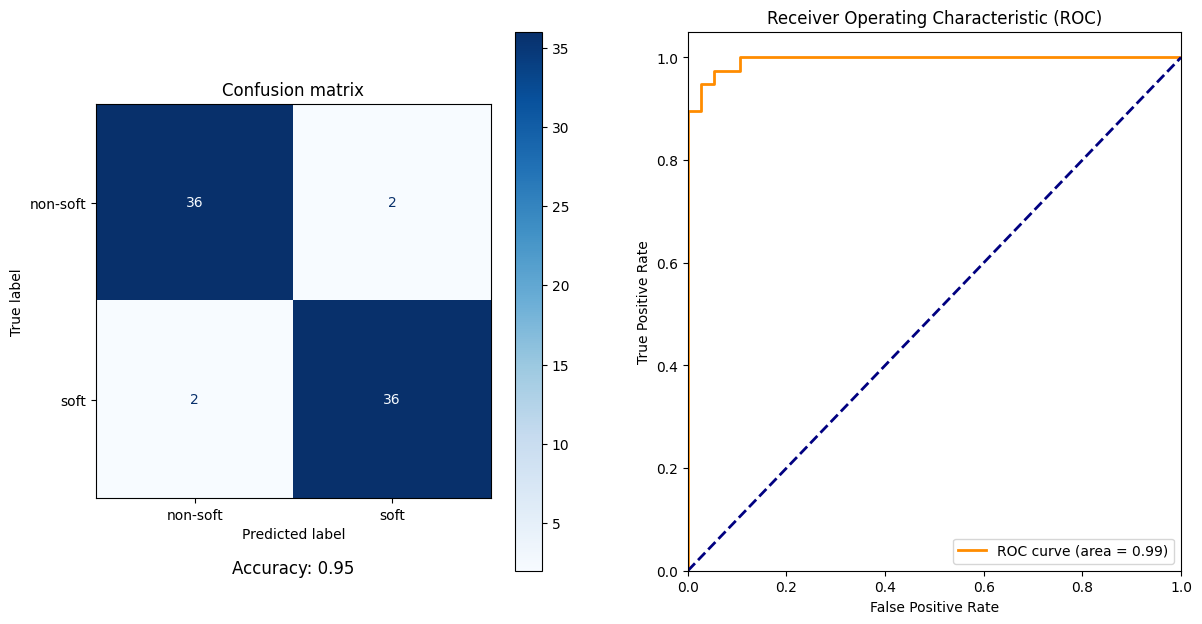

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (14, 7))

for x, y in test_loader:
    model = model_highlight(
        channels_in = 5,
        out_conv = 1024*5*5,
        hidden_layers = [128, 64],
        probability = 0.087849927
    )
    model.load_state_dict(torch.load("saved_models/best_model.pth"))
    model.eval()

    yhat = model(x)
    ytrue = y

acc = accuracy_trch(yhat, y)
cm = confusion_trch(yhat, y)
disp_cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["non-soft", "soft"])
disp_cm.plot(cmap = "Blues", ax = ax[0])
ax[0].set_title(f"Confusion matrix")
ax[0].text(0.5, -0.2, f"Accuracy: {acc:.2f}", ha="center", va = "bottom", fontsize=12, transform=ax[0].transAxes)

fpr, tpr, thresholds = roc_curve(ytrue.detach().numpy(), yhat.detach().numpy())
roc_auc = auc(fpr, tpr)

ax[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc="lower right")
plt.show()